# Importação das Bibliotecas

In [1]:
# Importação das Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from scipy import stats
from scipy.stats import binom, chisquare

# Base Application Data

In [2]:
# Base Application Data
# Carregar os dados

data = pd.read_csv('application_data.csv')

In [ ]:
data

# Selecao das colunas apartir de Analise Qualitativa

In [3]:
# Selecao das colunas apartir de Analise Qualitativa

# Visão Geral das Colunas Selecionadas

# Relação das colunas com valores Numéricos
col_numericas = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2', 'AMT_ANNUITY', 
                 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 
                 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'FLAG_PHONE', 'REGION_RATING_CLIENT', 
                 'TARGET']
# 13 colunas

# Relação das colunas com valores Categóricos 
col_texto = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_CONTRACT_TYPE']
# 9 colunas 
colunas_selecionadas = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2', 'AMT_ANNUITY', 
                 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 
                 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'FLAG_PHONE', 'REGION_RATING_CLIENT', 
                 'TARGET','CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_CONTRACT_TYPE'
] 

df_dados = data[colunas_selecionadas]

In [ ]:
df_dados.info()

In [ ]:
# dados numericos
df_num = data[col_numericas]
df_num

In [ ]:
# dados texto
df_texto = data[col_texto]
df_texto

# Analise dos dados
## Colunas com valores numéricos

In [ ]:
# Analise dos dados

# Colunas com valores numéricos
# - Análises da Distribuição das colunas
# -- Estatísticas Descritivas
# -- Analise de dados nulos
# --- Quantidade de valores nulos
# --- Porcentagem de valores nulos

# Colunas com valores categóricos (texto)
# - Análises da Distribuição de valores
# -- Estatísticas Descritivas
# -- Analise de dados nulos
# --- Quantidade de valores nulos
# --- Porcentagem de valores nulos

# -------------------------------------------------------------- #

# Analise dos dados
# Colunas com valores numéricos

print('Análises de Distribuição das colunas de probabilidade AMT_CREDIT, AMT_INCOME_TOTAL, CNT_CHILDREN: ')

colunas_selecionadas = [['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN']]

# Configurar estilo do seaborn
sns.set(style="whitegrid")

# Supondo que df seja o DataFrame original
df_01 = df_dados[['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN']]

# Plotar histogramas e gráficos de densidade para verificar a distribuição
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

for i, col in enumerate(['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN']):
    # Histograma
    sns.histplot(df_01[col].dropna(), kde=False, bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma de {col}')
    
    # Gráfico de densidade
    sns.kdeplot(df_01[col].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f'Gráfico de Densidade de {col}')

plt.tight_layout()
plt.show()

def analisar_dados_nulos(df):
    null_counts = df.isnull().sum()
    null_percentages = 100 * df.isnull().mean()
    null_summary = pd.DataFrame({
        'Número de valores nulos': null_counts,
        'Porcentagem de valores nulos': null_percentages
    })
    print(null_summary)

print('Estatísticas Descritivas: ')
print(df_01[['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN']].describe())

print('Analisando os dados nulos: ')
analisar_dados_nulos(df_01)


In [ ]:
print('Análises de Distribuição das colunas de probabilidade CNT_FAM_MEMBERS, DAYS_BIRTH, DAYS_EMPLOYED: ')

# Configurar estilo do seaborn
sns.set(style="whitegrid")

# Supondo que df seja o DataFrame original
df_02 = df_dados[['CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED']]

# Plotar histogramas e gráficos de densidade para verificar a distribuição
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

for i, col in enumerate(['CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED']):
    # Histograma
    sns.histplot(df_02[col].dropna(), kde=False, bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma de {col}')
    
    # Gráfico de densidade
    sns.kdeplot(df_02[col].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f'Gráfico de Densidade de {col}')

plt.tight_layout()
plt.show()

print('Estatísticas Descritivas: ')
print(df_02[['CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED']].describe())

print('Analisando os dados nulos: ')
analisar_dados_nulos(df_02)


In [ ]:
print('Análises de Distribuição das colunas de probabilidade EXT_SOURCE_2, AMT_ANNUITY, AMT_GOODS_PRICE, DAYS_REGISTRATION: ')

# Configurar estilo do seaborn
sns.set(style="whitegrid")

# Supondo que df seja o DataFrame original
df_03 = df_dados[['EXT_SOURCE_2','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION']]

# Plotar histogramas e gráficos de densidade para verificar a distribuição
fig, axes = plt.subplots(4, 2, figsize=(14, 12))

for i, col in enumerate(['EXT_SOURCE_2','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION']):
    # Histograma
    sns.histplot(df_03[col].dropna(), kde=False, bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma de {col}')
    
    # Gráfico de densidade
    sns.kdeplot(df_03[col].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f'Gráfico de Densidade de {col}')

plt.tight_layout()
plt.show()

print('Estatísticas Descritivas: ')
print(df_03[['EXT_SOURCE_2','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION']].describe())

print('Analisando os dados nulos: ')
analisar_dados_nulos(df_03)

In [ ]:
print('Análises de Distribuição das colunas de probabilidade FLAG_PHONE, REGION_RATING_CLIENT: ')

# Configurar estilo do seaborn e paleta de cores
sns.set(style="whitegrid", palette="pastel")

# Supondo que df seja o DataFrame original
df_05 = df_dados[['FLAG_PHONE','REGION_RATING_CLIENT']]

# Plotar gráficos de barras para verificar a moda
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Ajustar o tamanho da figura

for i, col in enumerate(['FLAG_PHONE','REGION_RATING_CLIENT']):
    value_counts = df_05[col].value_counts().sort_values(ascending=False)
    
    # Gráfico de barras com paleta de cores pastel
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], order=value_counts.index, palette="pastel")
    axes[i].set_title(f'Moda de {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Frequência')
    
    # Adicionar legendas em cada barra
    for index, value in enumerate(value_counts):
        axes[i].text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print('Estatísticas Descritivas: ')
print(df_05.describe())

print('Analisando os dados nulos: ')

def analisar_dados_nulos(df):
    null_counts = df.isnull().sum()
    null_percentages = 100 * df.isnull().mean()
    null_summary = pd.DataFrame({
        'Número de valores nulos': null_counts,
        'Porcentagem de valores nulos': null_percentages
    })
    print(null_summary)

analisar_dados_nulos(df_05)


In [ ]:
print('Análises de Distribuição das colunas de probabilidade TARGET: ')

# Configurar estilo do seaborn e paleta de cores
sns.set(style="whitegrid", palette="pastel")

# Supondo que df seja o DataFrame original
df_06 = df_dados[['TARGET']]

# Plotar gráfico de barras para verificar a moda
fig, axes = plt.subplots(1, 1, figsize=(7, 6))  # Ajustar o tamanho da figura

# Calcular a moda e plotar o gráfico de barras
value_counts = df_06['TARGET'].value_counts().sort_values(ascending=False)

# Gráfico de barras com paleta de cores pastel
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes, order=value_counts.index, palette="pastel")
axes.set_title(f'Moda de TARGET')
axes.set_xlabel('TARGET')
axes.set_ylabel('Frequência')

# Adicionar legendas em cada barra
for index, value in enumerate(value_counts):
    axes.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print('Estatísticas Descritivas: ')
print(df_06.describe())

print('Analisando os dados nulos: ')

def analisar_dados_nulos(df):
    null_counts = df.isnull().sum()
    null_percentages = 100 * df.isnull().mean()
    null_summary = pd.DataFrame({
        'Número de valores nulos': null_counts,
        'Porcentagem de valores nulos': null_percentages
    })
    print(null_summary)

analisar_dados_nulos(df_06)

# Analise dos dados
# Colunas com valores categóricos (texto)

In [ ]:
# Colunas com valores categóricos (texto)
# - Análises da Distribuição de valores

# Configurar estilo do seaborn e paleta de cores
sns.set(style="whitegrid", palette="pastel")

df_07 = df_dados[['CODE_GENDER', 'FLAG_OWN_CAR','NAME_CONTRACT_TYPE','FLAG_OWN_REALTY']]

# Plotando gráfico de barras para cada coluna
for coluna in df_07.columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df_07, x=coluna)
    plt.title(f'Distribuição de valores para a coluna {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    
    # Adicionando contagens nos gráficos
    for p in ax.patches:
        ax.annotate(f'{p.get_height()} ({p.get_height() / len(df_07) * 100:.2f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    # Calculando a moda
    moda = df_07[coluna].mode()[0]
    plt.axvline(x=moda, color='r', linestyle='--', label=f'Moda: {moda}')
    plt.legend()
    
    plt.show()

print('Estatísticas Descritivas: ')
print(df_07.describe())

def analisar_dados_nulos(df):
    null_counts = df.isnull().sum()
    null_percentages = 100 * df.isnull().mean()
    null_summary = pd.DataFrame({
        'Número de valores nulos': null_counts,
        'Porcentagem de valores nulos': null_percentages
    })
    print(null_summary)
    
print('Analisando os dados nulos: ')
analisar_dados_nulos(df_07)

# transformacao de texto binario - funcao dummy

# Limpeza e Pré-processamento dos Dados

In [4]:
# Limpeza e Pré-processamento dos Dados

# Definindo as colunas que têm linhas nulas
colunas_com_nulos = ['EXT_SOURCE_2', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS']

# Removendo linhas nulas apenas nas colunas especificadas
df_dados_sem_nulos = df_dados.dropna(subset=colunas_com_nulos)

# Calculando a quantidade de linhas removidas
linhas_removidas = len(df_dados) - len(df_dados_sem_nulos)

# Calculando a porcentagem de linhas removidas
percentual_removido = (linhas_removidas / len(df_dados)) * 100

# Verificando o tamanho do DataFrame após a remoção das linhas nulas
print("Número de linhas antes da remoção de linhas nulas:", len(df_dados))
print("Número de linhas após a remoção de linhas nulas:", len(df_dados_sem_nulos))
print("Número de linhas removidas:", linhas_removidas)
print(f"Percentual de linhas removidas: {percentual_removido:.2f}%")


Número de linhas antes da remoção de linhas nulas: 307511
Número de linhas após a remoção de linhas nulas: 306562
Número de linhas removidas: 949
Percentual de linhas removidas: 0.31%


In [ ]:
df_texto

# Ajuste da base para o modelo estatistico
# Tratamento das colunas com valores categóricos 

In [ ]:
df_dados_sem_nulos.info()

In [5]:
# Ajuste da base para o modelo estatistico
# Tratamento das colunas com valores categóricos 

# Coluna CODE_GENDER
df_dummies_gender = pd.get_dummies(df_dados_sem_nulos['CODE_GENDER'], prefix='CODE_GENDER')
df_dados_sem_nulos = pd.concat([df_dados_sem_nulos, df_dummies_gender], axis=1)
# add de 03 colunas

# Coluna FLAG_OWN_CAR
df_dummies_car = pd.get_dummies(df_dados_sem_nulos['FLAG_OWN_CAR'], prefix='FLAG_CAR')
df_dados_sem_nulos = pd.concat([df_dados_sem_nulos, df_dummies_car], axis=1)
# add de 02 colunas

# Coluna FLAG_OWN_REALTY
df_dummies_realty = pd.get_dummies(df_dados_sem_nulos['FLAG_OWN_REALTY'], prefix='FLAG_REALTY')
df_dados_sem_nulos = pd.concat([df_dados_sem_nulos, df_dummies_realty], axis=1)
# add de 02 colunas

# Coluna NAME_CONTRACT_TYPE
df_dummies_contract = pd.get_dummies(df_dados_sem_nulos['NAME_CONTRACT_TYPE'], prefix='CONTRACT_TYPE')
df_dados_sem_nulos = pd.concat([df_dados_sem_nulos, df_dummies_contract], axis=1)
# add de 02 colunas

# Excluir a coluna original (opcional)
df_dados_sem_nulos.drop(columns=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_CONTRACT_TYPE'], inplace=True)

rename_dict = {
    'CONTRACT_TYPE_Cash loans': 'CONTRACT_TYPE_Cash',
    'CONTRACT_TYPE_Revolving loans': 'CONTRACT_TYPE_Revolving'
}

# Renomear as colunas e converter para letras minusculas
df_dados_sem_nulos.rename(columns=rename_dict, inplace=True)
df_dados_sem_nulos.columns = df_dados_sem_nulos.columns.str.lower()

# adição total de 5 colunas

# Analise Estatistica dos Valores Numéricos (após a limpeza e pré-processamento dos dados)

Analise Estatistica dos Valores Numéricos (após a limpeza e pré-processamento dos dados)


Para realizar a análise estatística dos valores numéricos após o pré-processamento dos dados, podemos distinguir entre colunas que contêm dados discretos e colunas que contêm dados contínuos. A escolha do teste estatístico adequado e a interpretação do p-value dependem do tipo de distribuição dos dados e do objetivo da análise estatística. Vamos abordar isso com base nas informações fornecidas.

1. Dados Discretos

Para colunas que contêm dados discretos, podemos usar estatísticas descritivas apropriadas e, se necessário, realizar testes de hipótese específicos para dados discretos. Normalmente, isso envolve o uso de testes de proporção (como o teste binomial) ou testes qui-quadrado para verificar a associação entre variáveis categóricas.

Exemplo de análise:

    Variáveis de interesse: cnt_children, flag_phone, region_rating_client, etc.

    Teste estatístico: Teste de proporção (binomial) para verificar se a proporção de eventos em uma variável discreta é significativamente diferente de um valor esperado.

    Interpretação do p-value: O p-value mais relevante depende do teste específico. Em testes de proporção (binomial), um p-value baixo indica que a proporção observada é significativamente diferente da proporção esperada.

2. Dados Contínuos

Para colunas que contêm dados contínuos, as estatísticas descritivas comuns incluem média, mediana, desvio padrão, entre outros. Além disso, podemos realizar testes estatísticos como o teste t de Student para comparar médias de duas amostras independentes ou o teste de correlação de Pearson para avaliar a relação entre variáveis contínuas.

Exemplo de análise:

    Variáveis de interesse: amt_credit, amt_income_total, ext_source_2, etc.
    
    Teste estatístico: Teste t de Student para comparar médias entre dois grupos (se aplicável) ou teste de correlação de Pearson para verificar a relação entre variáveis contínuas.
    
    Interpretação do p-value: Um p-value baixo no teste t indica que as médias são significativamente diferentes entre os grupos comparados. No teste de correlação de Pearson, um p-value baixo indica uma correlação significativa entre as variáveis.

Para determinar quais colunas são discretas e quais são contínuas no DataFrame fornecido (`df_dados_sem_nulos`), podemos usar critérios comuns baseados nos tipos de dados e na natureza das variáveis. Vamos analisar cada uma das colunas fornecidas:

### Colunas do DataFrame `df_dados_sem_nulos`:
- DAYS_BIRTH
- DAYS_EMPLOYED
- EXT_SOURCE_2
- AMT_ANNUITY
- AMT_GOODS_PRICE
- DAYS_REGISTRATION
- AMT_CREDIT
- AMT_INCOME_TOTAL
- CNT_CHILDREN
- CNT_FAM_MEMBERS
- FLAG_PHONE
- REGION_RATING_CLIENT
- TARGET

### Análise das Colunas:

**1. Discretas:**
- **CNT_CHILDREN:** Número de crianças.
- **CNT_FAM_MEMBERS:** Quantidade de membros na família.
- **FLAG_PHONE:** Indica se há registro de número de telefone (usualmente binário: 0 ou 1).
- **REGION_RATING_CLIENT:** Classificação da região onde o cliente vive (tipicamente categorizado em algumas classes).

**2. Contínuas:**
- **DAYS_BIRTH:** Quantidade de dias desde o nascimento até a data do pedido de crédito.
- **DAYS_EMPLOYED:** Quantidade de dias desde que o cliente começou a trabalhar.
- **EXT_SOURCE_2:** Uma métrica normalizada de uma fonte externa (potencialmente variável contínua entre 0 e 1).
- **AMT_ANNUITY:** Valor da prestação do empréstimo.
- **AMT_GOODS_PRICE:** Valor dos bens para os quais o empréstimo é fornecido.
- **DAYS_REGISTRATION:** Quantidade de dias desde a última alteração no registro.
- **AMT_CREDIT:** Valor do crédito solicitado.
- **AMT_INCOME_TOTAL:** Renda total do aplicante.

### Classificação:

- **Discretas:** `CNT_CHILDREN`, `CNT_FAM_MEMBERS`, `FLAG_PHONE`, `REGION_RATING_CLIENT`
- **Contínuas:** `DAYS_BIRTH`, `DAYS_EMPLOYED`, `EXT_SOURCE_2`, `AMT_ANNUITY`, `AMT_GOODS_PRICE`, `DAYS_REGISTRATION`, `AMT_CREDIT`, `AMT_INCOME_TOTAL`

### Observações:

- **Discretas:** Essas colunas geralmente contêm valores que são contáveis ou categorizáveis de forma discreta, como número de crianças ou um indicador binário.
  
- **Contínuas:** São variáveis que podem ter uma ampla gama de valores dentro de um intervalo específico, como idade em dias, renda total ou valores de crédito.

Esta classificação pode variar dependendo do contexto específico do problema ou da análise que está sendo realizada. É sempre importante revisar as definições e os objetivos do estudo ao determinar se uma variável deve ser considerada discreta ou contínua.

In [ ]:
# Analise Estatistica dos Valores Numéricos (após a limpeza e pré-processamento dos dados)

# - Verificar quais colunas apresentam dados discretos
# -- Testes Discretos: Analisar qual estatistica descritiva representa o dado: binomial...
# -- Verificar o parâmetro 'p-value': qual pegar? o menor ou o maior p-value?

# - Verificar quais colunas apresentam dados continuos
# -- Testes Contínuos: Analisar qual estatistica descritiva representa o dado: qui-quadrado...
# -- Verificar o parâmetro 'p-value': qual pegar? o menor ou o maior p-value?

# -------------------------------------------------------------- #


## Verificar quais colunas apresentam dados discretos

In [ ]:
# Lista de colunas discretas
colunas_discretas = ['cnt_children', 'cnt_fam_members', 'flag_phone', 'region_rating_client','target']
df_discretas = df_dados_sem_nulos[colunas_discretas]

## Verificar a estatististica binomial para estes casos

In [ ]:
# Configuração do estilo do seaborn
sns.set(style="whitegrid")

# Função para analisar a distribuição binomial
def testar_distribuicao_binomial(df, coluna):
    # Seleciona os dados da coluna
    dados = df[coluna].dropna()
    
    # Verificar a frequência de valores 0 e 1
    freq = dados.value_counts().sort_index()
    n = len(dados)
    p = freq[1] / n  # Probabilidade de sucesso (valor 1)
    
    # Frequência esperada
    expected_freq = [n * (1 - p), n * p]
    
    # Teste de aderência usando Qui-Quadrado
    chi2_stat, p_val = stats.chisquare(f_obs=freq, f_exp=expected_freq)
       
    # Plotagem da distribuição observada e esperada
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Frequência observada
    sns.barplot(x=freq.index, y=freq.values, alpha=0.5, color='b', label='Observada', ax=ax)
    
    # Frequência esperada
    sns.barplot(x=[0, 1], y=expected_freq, alpha=0.5, color='r', label='Esperada', ax=ax)
    
    ax.set_title(f'Distribuição Binomial de {coluna}')
    ax.set_xlabel(coluna)
    ax.set_ylabel('Frequência')
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f'Análise da coluna {coluna}:')
    print(f'Número de observações: {n}')
    print(f'Frequência observada: {freq.to_dict()}')
    print(f'Frequência esperada: {expected_freq}')
    print(f'Estatística de Qui-Quadrado: {chi2_stat}')
    
    return p, p_val

In [ ]:
# Executar a análise para a coluna FLAG_PHONE
coluna_flag_phone = 'flag_phone'
probabilidade, valor_p = testar_distribuicao_binomial(df_dados_sem_nulos, coluna_flag_phone)

# Exibir os resultados
print("Resultados da Análise Binomial para flag_phone:")
print(f"Probabilidade de sucesso (p): {probabilidade}")
print(f"Valor-p: {valor_p}")

In [ ]:
# Função modificada para analisar a distribuição binomial de qualquer coluna
def testar_distribuicao_binomial_qualquer(df, coluna):
    # Seleciona os dados da coluna
    dados = df[coluna].dropna()
    
    # Verificar a frequência dos valores únicos
    freq = dados.value_counts().sort_index()
    n = len(dados)
    
    # Calcula as frequências esperadas para cada valor observado
    p = [freq[val] / n for val in freq.index]
    expected_freq = [n * prob for prob in p]
    
    # Teste de aderência usando Qui-Quadrado
    chi2_stat, p_val = stats.chisquare(f_obs=freq, f_exp=expected_freq)
        
    # Plotagem da distribuição observada e esperada
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Frequência observada
    sns.barplot(x=freq.index, y=freq.values, alpha=0.5, color='b', label='Observada', ax=ax)
    
    # Frequência esperada
    sns.barplot(x=freq.index, y=expected_freq, alpha=0.5, color='r', label='Esperada', ax=ax)
    
    ax.set_title(f'Distribuição de {coluna}')
    ax.set_xlabel(coluna)
    ax.set_ylabel('Frequência')
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    print(f'Análise da coluna {coluna}:')
    print(f'Número de observações: {n}')
    print(f'Frequência observada: {freq.to_dict()}')
    print(f'Frequência esperada: {expected_freq}')
    print(f'Estatística de Qui-Quadrado: {chi2_stat}')
    print(f'Valor-p: {p_val}')
    return p, p_val

# Executar a análise para a coluna REGION_RATING_CLIENT
coluna_region_rating_client = 'region_rating_client'
probabilidade_region, valor_p_region = testar_distribuicao_binomial_qualquer(df_dados_sem_nulos, coluna_region_rating_client)

# Exibir os resultados
print("Resultados da Análise para region_rating_client:")
print(f"Probabilidades: {probabilidade_region}")

In [ ]:
# Executar a análise para a coluna target
coluna_target = 'target'
probabilidade_region, valor_p_region = testar_distribuicao_binomial_qualquer(df_dados_sem_nulos, coluna_target)

# Exibir os resultados
print("Resultados da Análise para target:")
print(f"Probabilidades: {probabilidade_region}")

In [ ]:
# Executar a análise para a coluna cnt_children
coluna_target = 'cnt_children'
probabilidade_region, valor_p_region = testar_distribuicao_binomial_qualquer(df_dados_sem_nulos, coluna_target)

# Exibir os resultados
print("Resultados da Análise para target:")
print(f"Probabilidades: {probabilidade_region}")
print('Conclusoes: ')
print('As probabilidades calculadas confirmam a distribuição do número de filhos: A maior parte dos dados está concentrada em 0 a 2 filhos. Conforme o número de filhos aumenta, a probabilidade diminui drasticamente, o que é consistente com a distribuição esperada em uma população.')

In [ ]:
# Executar a análise para a coluna cnt_fam_members
coluna_target = 'cnt_fam_members'
probabilidade_region, valor_p_region = testar_distribuicao_binomial_qualquer(df_dados_sem_nulos, coluna_target)

# Exibir os resultados
print("Resultados da Análise para target:")
print(f"Probabilidades: {probabilidade_region}")
print('Conclusoes:')
print('As probabilidades calculadas confirmam a distribuição dos membros da família: A maior parte dos dados está concentrada entre 1 a 4 membros da família.Conforme o número de membros da família aumenta, a probabilidade diminui drasticamente, o que é consistente com a distribuição esperada em uma população.')

In [ ]:
# - Verificar quais colunas apresentam dados continuos
# -- Testes Contínuos: Analisar qual estatistica descritiva representa o dado: qui-quadrado...
# -- Verificar o parâmetro 'p-value': qual pegar? o menor ou o maior p-value?

## Verificar quais colunas apresentam dados continuos

In [ ]:
colunas_continuas = ['days_birth', 'days_employed', 'ext_source_2', 'amt_annuity', 
                     'amt_goods_price', 'days_registration', 'amt_credit', 'amt_income_total']
df_continuas = df_dados_sem_nulos[colunas_continuas]
df_continuas

In [ ]:
print('Verificando a distribuição Normal no conjunto de dados continuos')
resultados = {}
for coluna in colunas_continuas:
    dados = df_continuas[coluna]
    mu, std = np.mean(dados), np.std(dados)

    # Calculando a estatística KS e o valor-p
    ks_stat, p_value = stats.kstest(dados, 'norm', args=(mu, std))
    print(coluna)
    # Conclusão
    alpha = 0.05,
    if p_value < alpha:
         print("Rejeitar H0: Os dados não seguem uma distribuição normal.")
    else:
         print("Não rejeitar H0: Os dados seguem uma distribuição normal.")
            
    resultados[coluna] = {
        print(f'Estatística KS: {ks_stat}'),
        print(f'Valor-p: {p_value}'),

    }


In [ ]:
print('Verificando a distribuição Log-normal no conjunto de dados continuos')
resultados = {}
for coluna in colunas_continuas:
    dados = df_continuas[coluna]
    
    # Transformando os dados para a distribuição log-normal
    dados_log = np.log(dados)
    mu_log, std_log = np.mean(dados_log), np.std(dados_log)
    
    # Calculando a estatística KS e o valor-p para log-normal
    ks_stat, p_value = stats.kstest(dados_log, 'norm', args=(mu_log, std_log))
    print(coluna)
    # Conclusão
    alpha = 0.05,
    if p_value < alpha:
         print("Rejeitar H0: Os dados não seguem uma distribuição log-normal.")
    else:
         print("Não rejeitar H0: Os dados seguem uma distribuição log-normal.")
            
    resultados[coluna] = {
        print(f'Estatística KS para Log-Normal: {ks_stat}'),
        print(f'Valor-p para Log-Normal: {p_value}'),

    }

In [ ]:
df_dados_sem_nulos.info()

## Arvore de Decisao 1: Base df_dados_sem_nulos

In [6]:
# 2. Divisão do Conjunto de Dados
# Dividimos os dados em conjuntos de treino e teste para treinar e avaliar os modelos.

# Separar as features (X) e o target (y)
X = df_dados_sem_nulos.drop(columns=['target'])
y = df_dados_sem_nulos['target']

# Transformar variáveis categóricas em variáveis dummy
X = pd.get_dummies(X)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 3. Treinamento de um Modelo de Árvore de Decisão
# Treinamos uma Árvore de Decisão usando DecisionTreeClassifier do Scikit-learn.
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# 4. Treinamento de um Modelo de Random Forest
# Treinamos um Random Forest usando RandomForestClassifier do Scikit-learn.
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Decision Tree Model Evaluation
Accuracy: 0.8492
ROC AUC: 0.5279


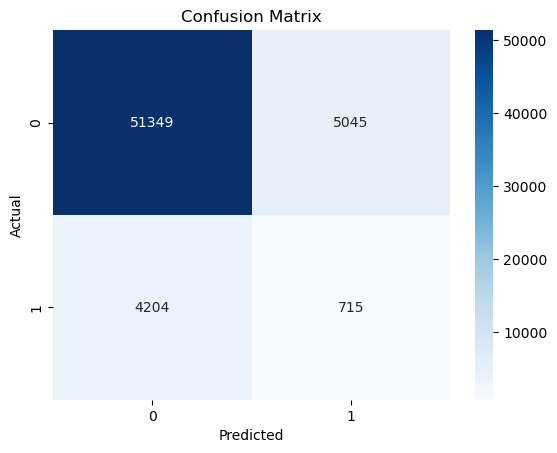

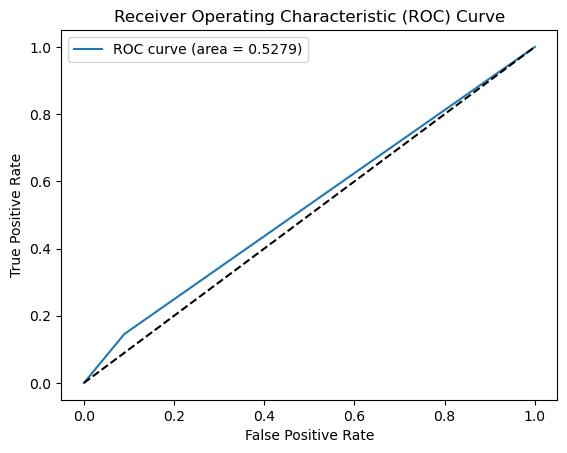

Random Forest Model Evaluation
Accuracy: 0.9196
ROC AUC: 0.6780


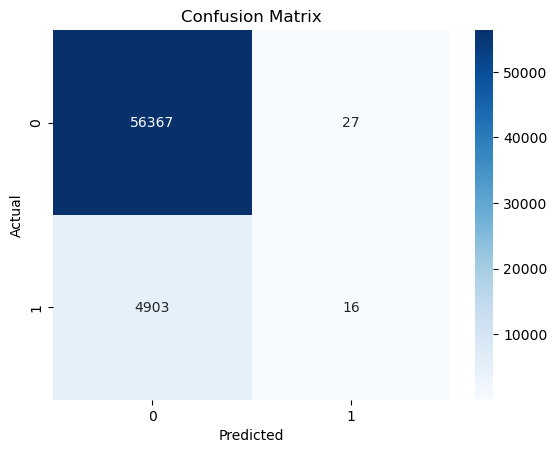

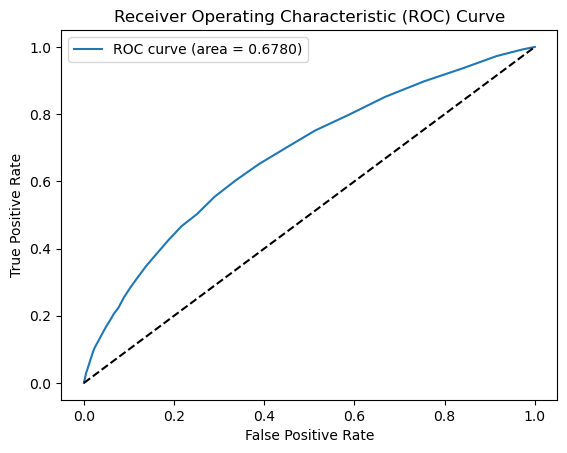

In [9]:
# 5. Avaliação dos Modelos
# Avaliamos os modelos usando métricas como Acurácia, Matriz de Confusão, ROC-AUC, etc.
def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    print(f'Accuracy: {acc:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='best')
    plt.show()

print("Decision Tree Model Evaluation")
evaluate_model(dt_clf, X_test, y_test)

print("Random Forest Model Evaluation")
evaluate_model(rf_clf, X_test, y_test)

In [ ]:
pip install graphviz

## Arvore de Decisao 2: Base df_dados_sem_dummies

In [10]:
colunas_selecionadas = ['days_birth', 'days_employed', 'ext_source_2', 'amt_annuity', 
                 'amt_goods_price', 'days_registration', 'amt_credit', 'amt_income_total', 
                 'cnt_children', 'cnt_fam_members', 'flag_phone', 'region_rating_client', 
                 'target'] 
    
df_dados_sem_dummies = df_dados_sem_nulos[colunas_selecionadas]

In [11]:
df_dados_sem_dummies

,days_birth,days_employed,ext_source_2,amt_annuity,amt_goods_price,days_registration,amt_credit,amt_income_total,cnt_children,cnt_fam_members,flag_phone,region_rating_client,target
0,-9461,-637,0.262949,24700.5,351000.0,-3648.0,406597.5,202500.0,0,1.0,1,2,1
1,-16765,-1188,0.622246,35698.5,1129500.0,-1186.0,1293502.5,270000.0,0,2.0,1,1,0
2,-19046,-225,0.555912,6750.0,135000.0,-4260.0,135000.0,67500.0,0,1.0,1,2,0
3,-19005,-3039,0.650442,29686.5,297000.0,-9833.0,312682.5,135000.0,0,2.0,0,2,0
4,-19932,-3038,0.322738,21865.5,513000.0,-4311.0,513000.0,121500.0,0,1.0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,-9327,-236,0.681632,27558.0,225000.0,-8456.0,254700.0,157500.0,0,1.0,0,1,0
307507,-20775,365243,0.115992,12001.5,225000.0,-4388.0,269550.0,72000.0,0,1.0,1,2,0
307508,-14966,-7921,0.535722,29979.0,585000.0,-6737.0,677664.0,153000.0,0,1.0,0,3,0
307509,-11961,-4786,0.514163,20205.0,319500.0,-2562.0,370107.0,171000.0,0,2.0,0,2,1


In [12]:
# 2. Divisão do Conjunto de Dados
# Dividimos os dados em conjuntos de treino e teste para treinar e avaliar os modelos.

# Separar as features (X) e o target (y)
X = df_dados_sem_dummies.drop(columns=['target'])
y = df_dados_sem_dummies['target']

# Transformar variáveis categóricas em variáveis dummy
X = pd.get_dummies(X)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# 3. Treinamento de um Modelo de Árvore de Decisão
# Treinamos uma Árvore de Decisão usando DecisionTreeClassifier do Scikit-learn.
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
# 4. Treinamento de um Modelo de Random Forest
# Treinamos um Random Forest usando RandomForestClassifier do Scikit-learn.
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Decision Tree Model Evaluation
Accuracy: 0.8480
ROC AUC: 0.5299


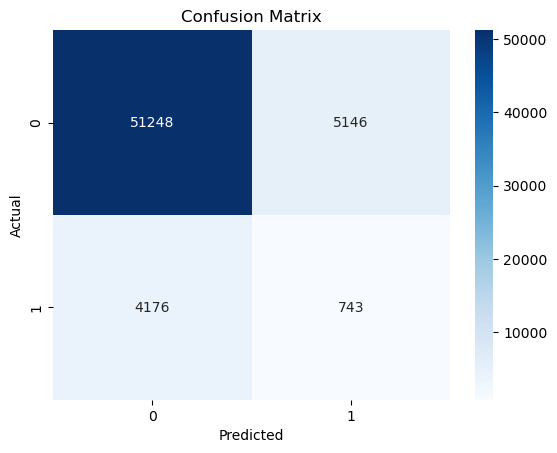

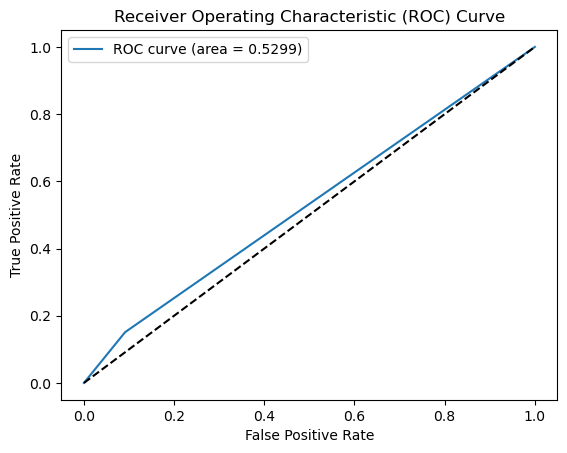

Random Forest Model Evaluation
Accuracy: 0.9197
ROC AUC: 0.6712


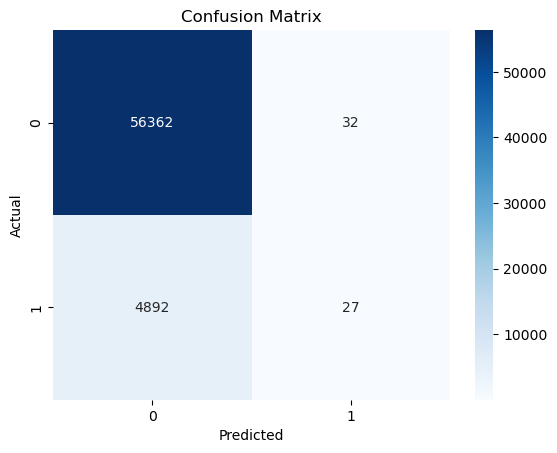

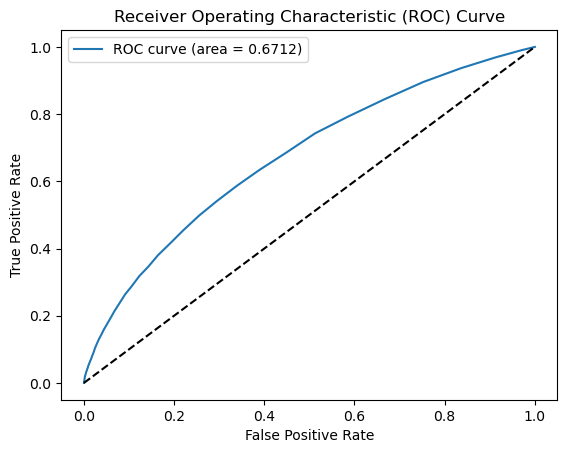

In [15]:
# 5. Avaliação dos Modelos
# Avaliamos os modelos usando métricas como Acurácia, Matriz de Confusão, ROC-AUC, etc.
def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    print(f'Accuracy: {acc:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='best')
    plt.show()

print("Decision Tree Model Evaluation")
evaluate_model(dt_clf, X_test, y_test)

print("Random Forest Model Evaluation")
evaluate_model(rf_clf, X_test, y_test)

## Arvore de Decisao 3: Base df_dados_balanceados

### Balanceando a base para tentar melhorar o modelo arvores decisao

In [16]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Separando os features e o target
X = df_dados_sem_nulos.drop('target', axis=1)
y = df_dados_sem_nulos['target']

# Aplicando Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Verificando o balanceamento das classes após o oversampling
print(pd.Series(y_resampled).value_counts())

# Dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Agora você pode treinar seus modelos de árvore de decisão ou outros com X_train, y_train
# e avaliá-los com X_test, y_test

1    281810
0    281810
Name: target, dtype: int64


In [17]:
# 3. Treinamento de um Modelo de Árvore de Decisão
# Treinamos uma Árvore de Decisão usando DecisionTreeClassifier do Scikit-learn.
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# 4. Treinamento de um Modelo de Random Forest
# Treinamos um Random Forest usando RandomForestClassifier do Scikit-learn.
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

In [ ]:
# 5. Avaliação dos Modelos
# Avaliamos os modelos usando métricas como Acurácia, Matriz de Confusão, ROC-AUC, etc.
def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    print(f'Accuracy: {acc:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='best')
    plt.show()

print("Decision Tree Model Evaluation")
evaluate_model(dt_clf, X_test, y_test)

print("Random Forest Model Evaluation")
evaluate_model(rf_clf, X_test, y_test)


In [ ]:
Arvore 03 (df_balanceado_undersampling)
Decision Tree Model Evaluation
Accuracy: 0.5652
ROC AUC: 0.5652
[[2821  2165]
 [ 2132   2764]]

### Exportando resultados para analise 

In [ ]:
import pandas as pd

# Salvar o DataFrame como um arquivo CSV
file_path = 'C:/Users/Hideki/Desktop/AMANDA/df_dados_sem_nulos.csv'
#file_path = '/mnt/data/df_dados_sem_nulos.csv'
df_dados_sem_nulos.to_csv(file_path, index=False)

file_path
